In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import os
import statistics
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

## Analysis on Problem 2:

# Q2.1 Read the data as an appropriate Time Series data and plot the data.

In [276]:
df1 = pd.read_csv('Downloads/Rose.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [277]:
# Top 5 rows of the data.
df1.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [278]:
# last 5 rows of the data.
df1.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [279]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [280]:
df1.isnull().sum()

Rose    2
dtype: int64

We can see that there are null values present in the data so will impute them

In [281]:
df1=df1.interpolate()

In [282]:
df1.isnull().sum()

Rose    0
dtype: int64

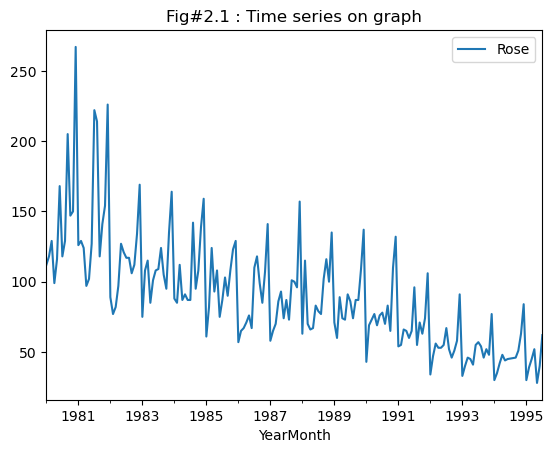

In [283]:
#Plot the time series
df1.plot()
plt.title('Fig#2.1 : Time series on graph');
plt.show()

As per the graph Rose wine sales hit maximum numbers in year 1981.

# Q2.2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [284]:
df1.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='YearMonth')

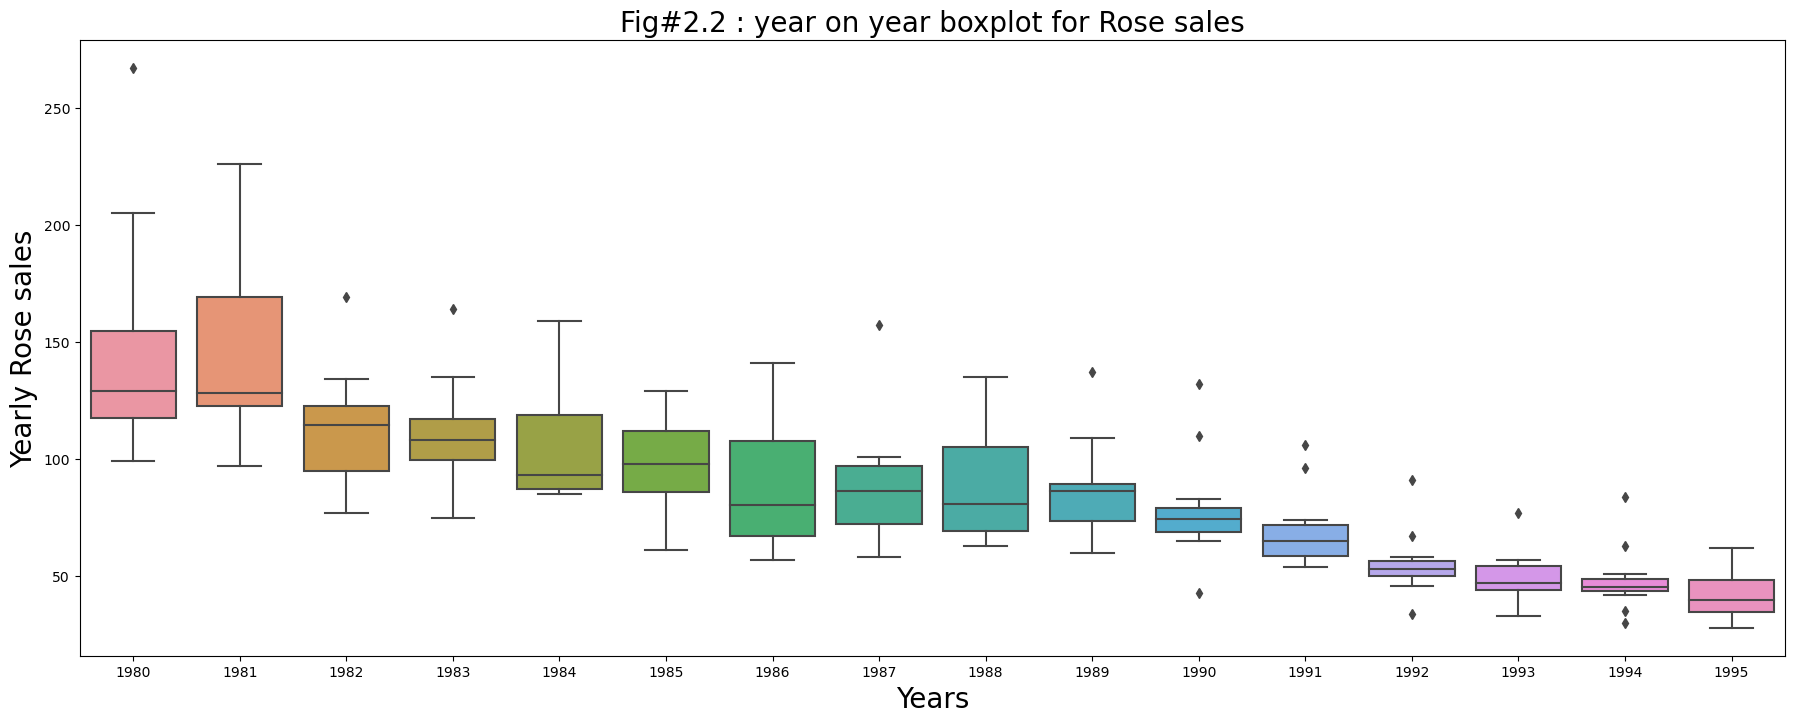

In [285]:
plt.subplots(figsize=(22,8))
sns.boxplot(df1.index.year, y= 'Rose', data=df1)
plt.xlabel('Years',fontsize=20);
plt.ylabel('Yearly Rose sales',fontsize=20);
plt.title('Fig#2.2 : year on year boxplot for Rose sales',fontsize=20);

We can see that we have data from past 16 years .

As we got to know from the Time Series plot, the boxplots over here indicates trend present. Also, we see that the sales of wine has some outliers for most of years.

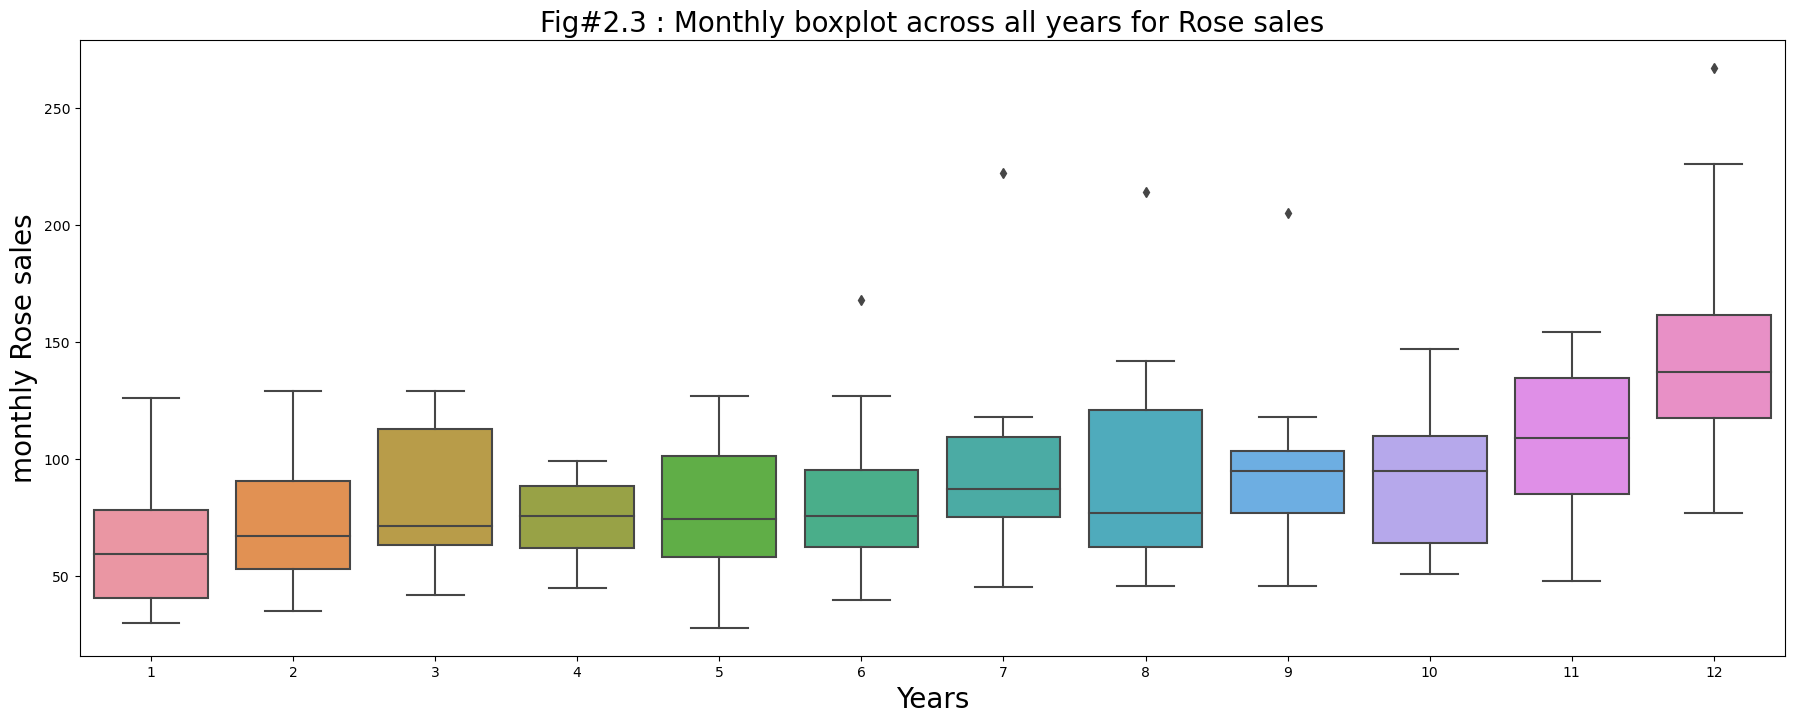

In [286]:
plt.subplots(figsize=(22,8))
sns.boxplot(df1.index.month, y= 'Rose', data=df1)
plt.xlabel('Years',fontsize=20);
plt.ylabel('monthly Rose sales',fontsize=20);
plt.title('Fig#2.3 : Monthly boxplot across all years for Rose sales',fontsize=20);

The boxplots for the monthly production for different years have outliers.

We can see that sales of Rose wine have some increase at the end of the year.

## Plot a monthplot of the given Time Series.

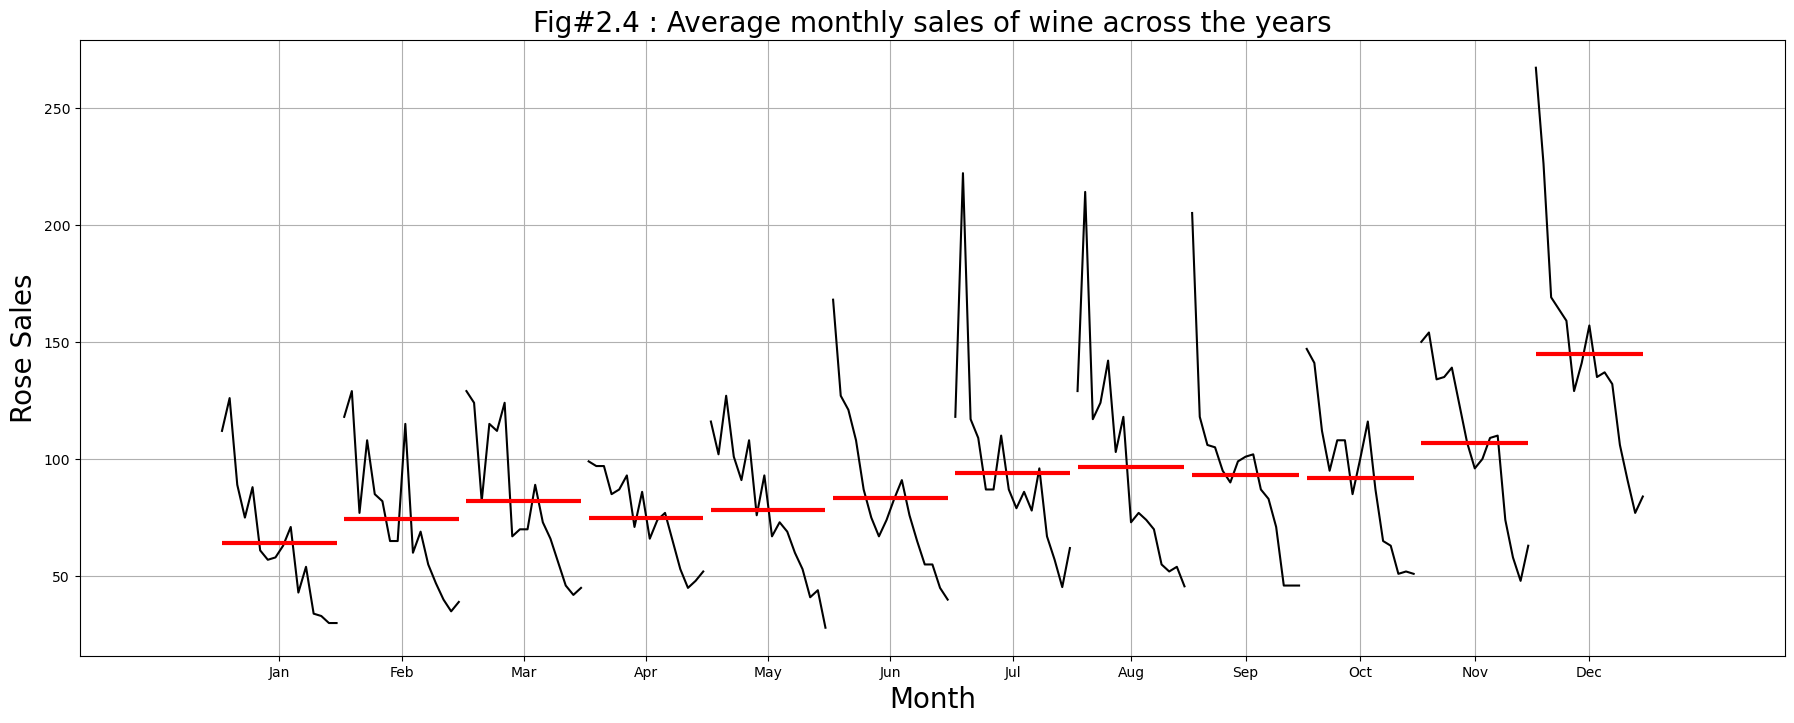

In [287]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df1,ylabel='Rose Sales',ax=ax)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Rose Sales', fontsize=20)
plt.title('Fig#2.4 : Average monthly sales of wine across the years',fontsize=20);
plt.grid();

Here the red line shows the average wine sales for all the years in a particular month.

### Plot a graph of monthly sales across years.

In [288]:
monthly_sales_across_years = pd.pivot_table(df1, values = 'Rose', columns = df1.index.month_name(), index = df1.index.year)
monthly_sales_across_years

YearMonth,April,August,December,February,January,July,June,March,May,November,October,September
YearMonth,,,,,,,,,,,,
1980,99.0,129.000000,267.0,118.0,112.0,118.000000,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.000000,226.0,129.0,126.0,222.000000,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.000000,169.0,77.0,89.0,117.000000,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.000000,164.0,108.0,75.0,109.000000,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.000000,159.0,85.0,88.0,87.000000,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.000000,129.0,82.0,61.0,87.000000,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.000000,141.0,65.0,57.0,110.000000,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.000000,157.0,65.0,58.0,87.000000,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.000000,135.0,115.0,63.0,79.000000,83.0,70.0,67.0,100.0,116.0,102.0


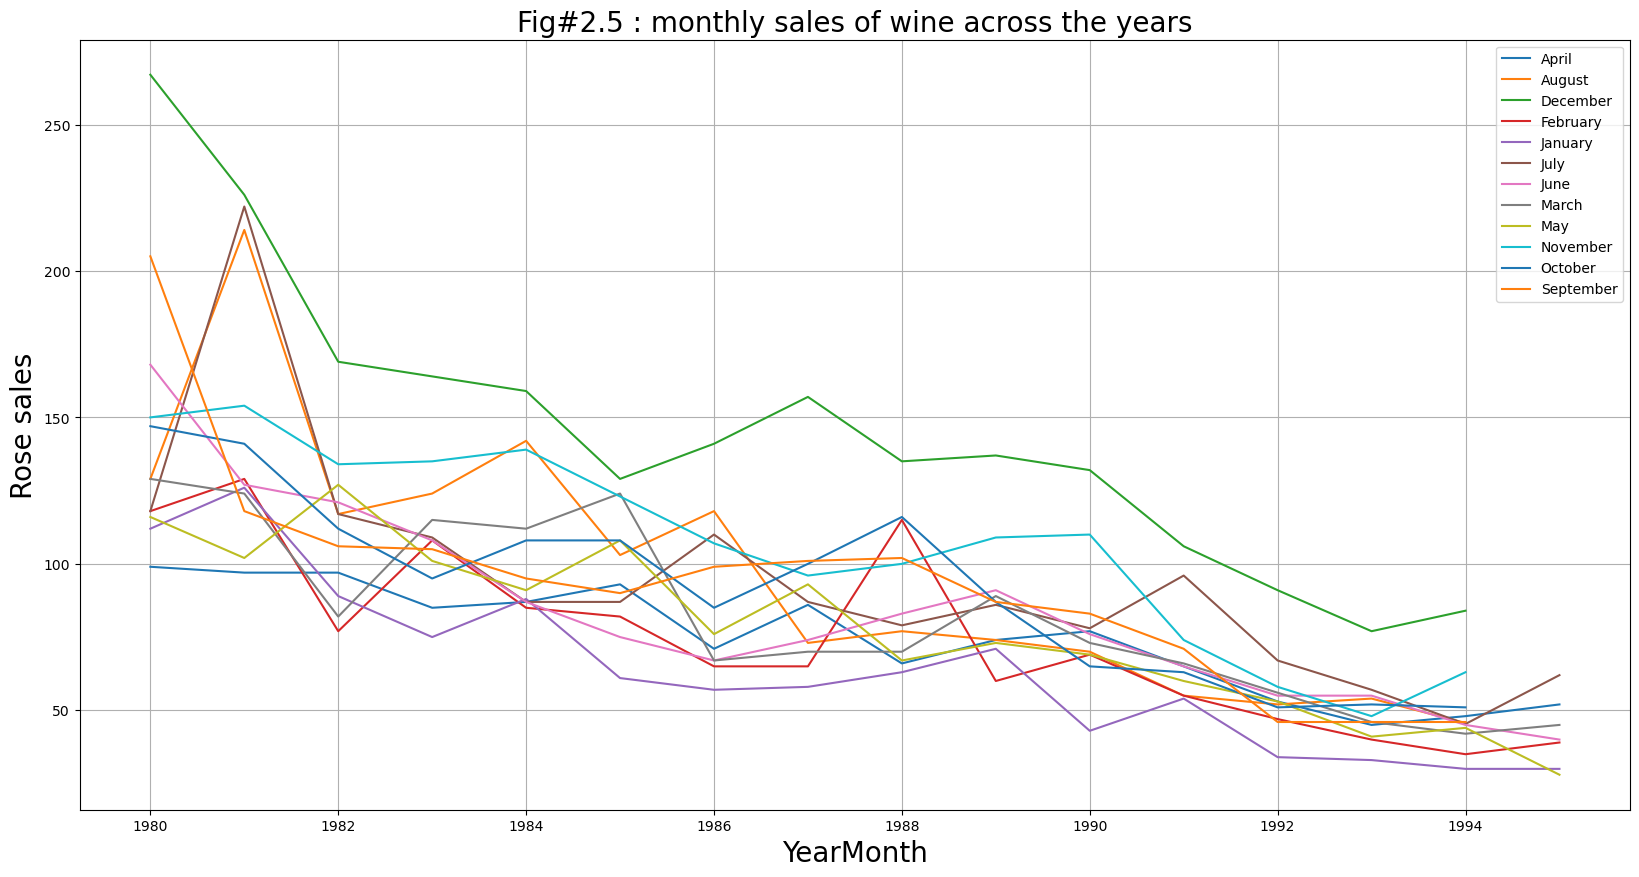

In [289]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');
plt.ylabel('Rose sales',fontsize=20);
plt.xlabel('YearMonth', fontsize=20)
plt.title('Fig#2.5 : monthly sales of wine across the years',fontsize=20);

We can see that sales are maximum for december month.

## Read this monthly data into a quarterly and yearly format

### Yearly plot

In [290]:
df1_yearly_sum = df1.resample('A').sum()
df1_yearly_sum.head()

,Rose
YearMonth,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0


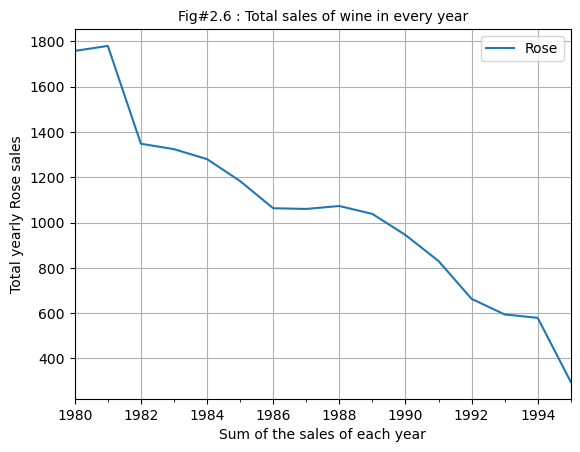

In [291]:
df1_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the sales of each year');
plt.ylabel('Total yearly Rose sales',fontsize=10);
plt.title('Fig#2.6 : Total sales of wine in every year',fontsize=10);

In [292]:
df1_yearly_mean = df1.resample('A').mean()
df1_yearly_mean.head()

,Rose
YearMonth,
1980-12-31,146.500000
1981-12-31,148.333333
1982-12-31,112.333333
1983-12-31,110.333333
1984-12-31,106.666667


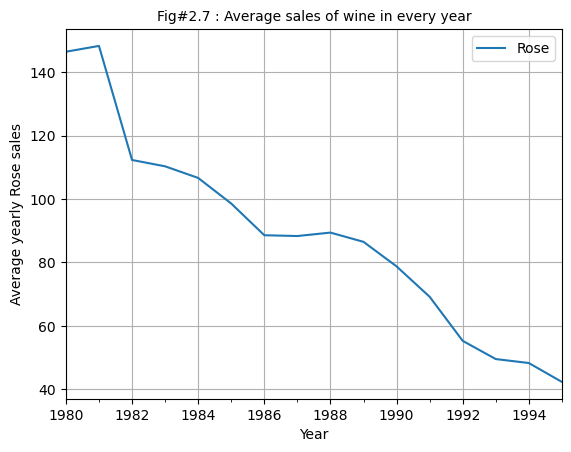

In [293]:
df1_yearly_mean.plot();
plt.grid()
plt.xlabel('Year');
plt.ylabel('Average yearly Rose sales',fontsize=10);
plt.title('Fig#2.7 : Average sales of wine in every year',fontsize=10);

### Quarterly  plot

In [294]:
df1_quarterly_sum = df1.resample('Q').sum()
df1_quarterly_sum.head()

,Rose
YearMonth,
1980-03-31,359.0
1980-06-30,383.0
1980-09-30,452.0
1980-12-31,564.0
1981-03-31,379.0


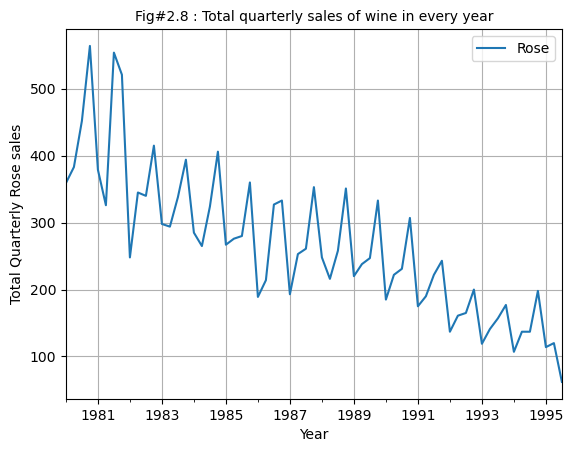

In [295]:
df1_quarterly_sum.plot();
plt.grid()
plt.xlabel('Year')
plt.ylabel('Total Quarterly Rose sales',fontsize=10);
plt.title('Fig#2.8 : Total quarterly sales of wine in every year',fontsize=10);

In [296]:
df1_quarterly_mean = df1.resample('Q').mean()
df1_quarterly_mean.head()

,Rose
YearMonth,
1980-03-31,119.666667
1980-06-30,127.666667
1980-09-30,150.666667
1980-12-31,188.000000
1981-03-31,126.333333


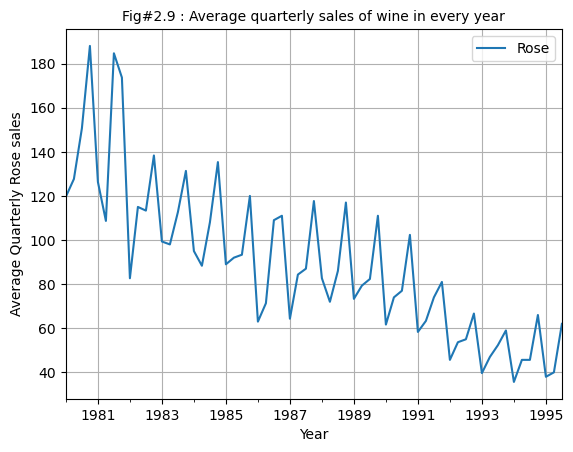

In [297]:
df1_quarterly_mean.plot();
plt.grid()
plt.xlabel('Year')
plt.ylabel('Average Quarterly Rose sales',fontsize=10);
plt.title('Fig#2.9 : Average quarterly sales of wine in every year',fontsize=10);

## Decompose the Time Series

### Additive Model

In [298]:
from statsmodels.tsa.seasonal import seasonal_decompose

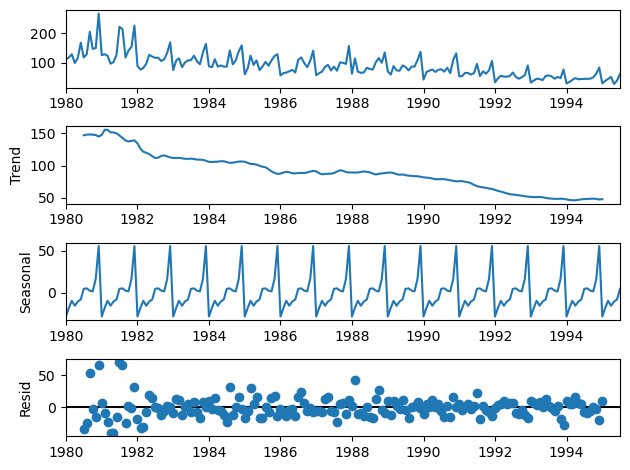

In [299]:
decomposition = seasonal_decompose(df1,model='additive')
decomposition.plot();

We can see that trend & seasonality present in the time series data.

We can see that residuals are random 

In [300]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [301]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.16142

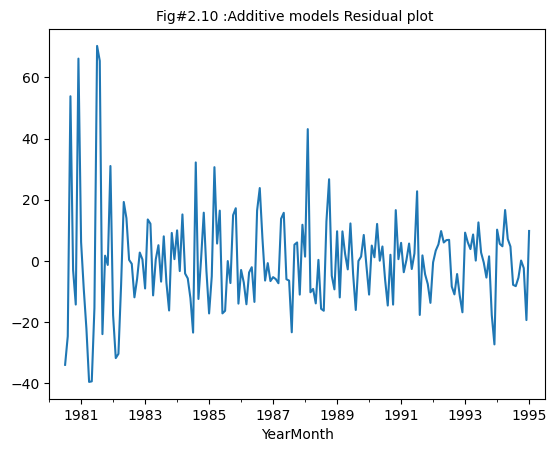

In [302]:
residual.plot()
plt.title('Fig#2.10 :Additive models Residual plot ',fontsize=10);
plt.show()

### Multiplicative Model

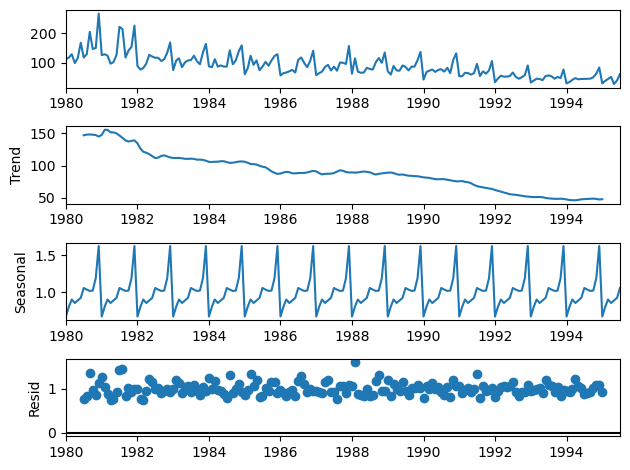

In [303]:
decomposition_mul = seasonal_decompose(df1,model='multiplicative')
decomposition_mul.plot();

as per multiplicative model We can see that Trend & seasonality present in the time series data

In [304]:
trend = decomposition_mul.trend
seasonality = decomposition_mul.seasonal
residual = decomposition_mul.resid

In [305]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: fl

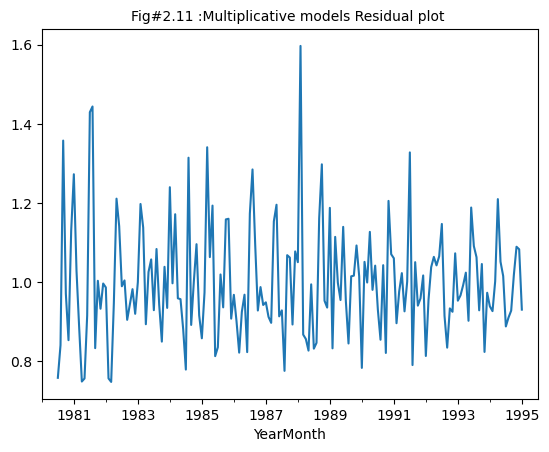

In [306]:
residual.plot()
plt.title('Fig#2.11 :Multiplicative models Residual plot ',fontsize=10);
plt.show()

We can see that in both residual's plot residuals are random as it does not follow any pattern and so there is no clear merit to specifially choose multiplocate decomsitation as additive is good enough.

# Q2.3 Split the data into training and test. The test data should start in 1991. 

### Split the data into train and test and plot the training and test data

In [307]:
train = df1[df1.index<'1991'] 
test = df1[df1.index>='1991']

In [308]:
train.shape

(132, 1)

In [309]:
test.shape

(55, 1)

In [310]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Training Data


,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


First few rows of Test Data


,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


Last few rows of Test Data


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


# Q2.4 Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

In [311]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

## Model 1: Simple Exponential Smoothing

In [312]:
SES_train = train.copy()
SES_test = test.copy()

In [313]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [314]:
model_SES_autofit = model_SES.fit(optimized=True)

In [315]:
model_SES_autofit.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [316]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,87.104983
1991-02-01,55.0,87.104983
1991-03-01,66.0,87.104983
1991-04-01,65.0,87.104983
1991-05-01,60.0,87.104983


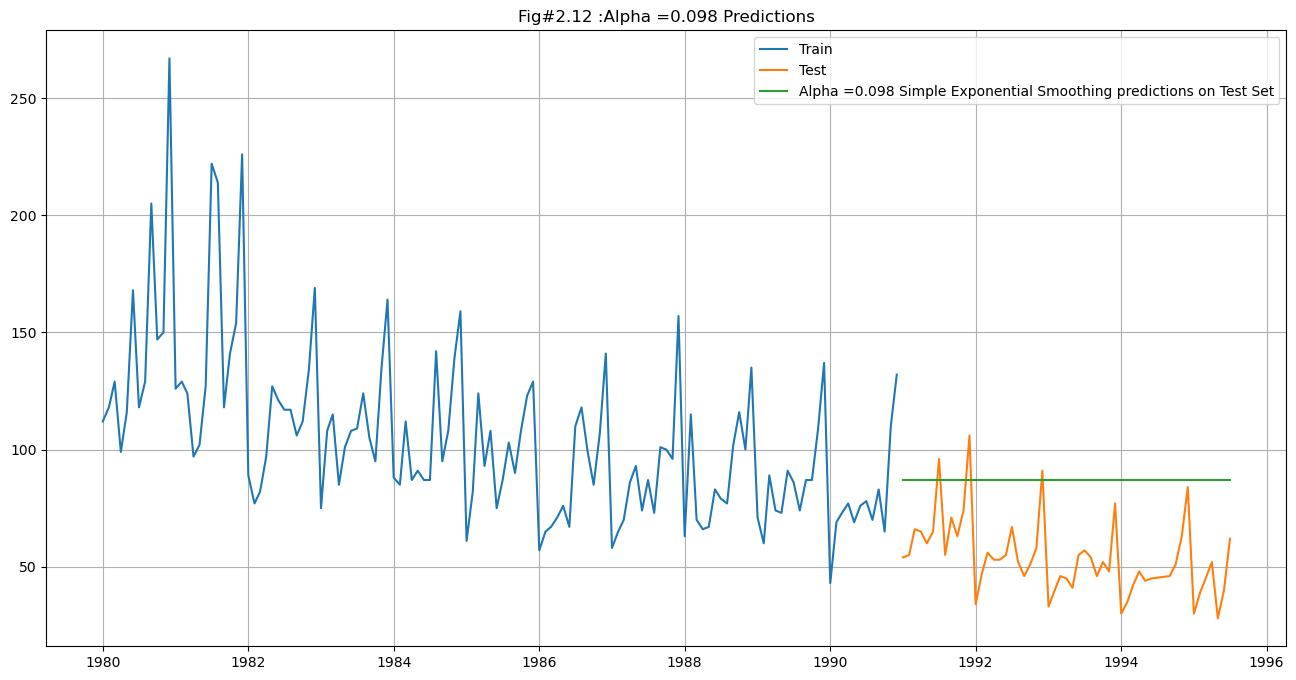

In [317]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Fig#2.12 :Alpha =0.098 Predictions');

### Model Evaluation for α = 0.098 : Simple Exponential Smoothing

In [318]:
from sklearn import metrics

In [319]:
rmse_model1_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model1_test_1))

For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.796


In [320]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test_1]},index=['Alpha =0.098, Simple Exponential Smoothing'])
resultsDf

,Test RMSE
"Alpha =0.098, Simple Exponential Smoothing",36.796227


#### checking different alpha values

In [321]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_1 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_1

,Alpha Values,Train RMSE,Test RMSE


In [322]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model1_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model1_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_1 = resultsDf_1.append({'Alpha Values':i,'Train RMSE':rmse_model1_train_i 
                                      ,'Test RMSE':rmse_model1_test_i}, ignore_index=True)

### Model Evaluation

In [323]:
resultsDf_1.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.3,32.470164,47.504821
1,0.4,33.035130,53.767406
2,0.5,33.682839,59.641786
3,0.6,34.441171,64.971288
4,0.7,35.323261,69.698162
5,0.8,36.334596,73.773992
6,0.9,37.482782,77.139276


After checking different value of alpha we are unable to get RMSE less than 36.79 which we obtained when Alpha = 0.098

With Alpha =0.098 we can say that past observations have a large influence on forecasts.

In [324]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test_1]},index=['Alpha=0.098,SimpleExponentialSmoothing'])
resultsDf

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.796227


## Model 2: Double Exponential Smoothing (Holt's Model)

In [325]:
DES_train = train.copy()
DES_test = test.copy()

In [326]:
model_DES = Holt(DES_train['Rose'])

In [327]:
model_DES_autofit= model_DES.fit(optimized=True)

In [328]:
model_DES_autofit.params

{'smoothing_level': 0.017549790270679714,
 'smoothing_trend': 3.236153800377395e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.82081494774005,
 'initial_trend': -0.492580228245491,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [329]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,73.259732
1991-02-01,55.0,72.767150
1991-03-01,66.0,72.274569
1991-04-01,65.0,71.781987
1991-05-01,60.0,71.289405


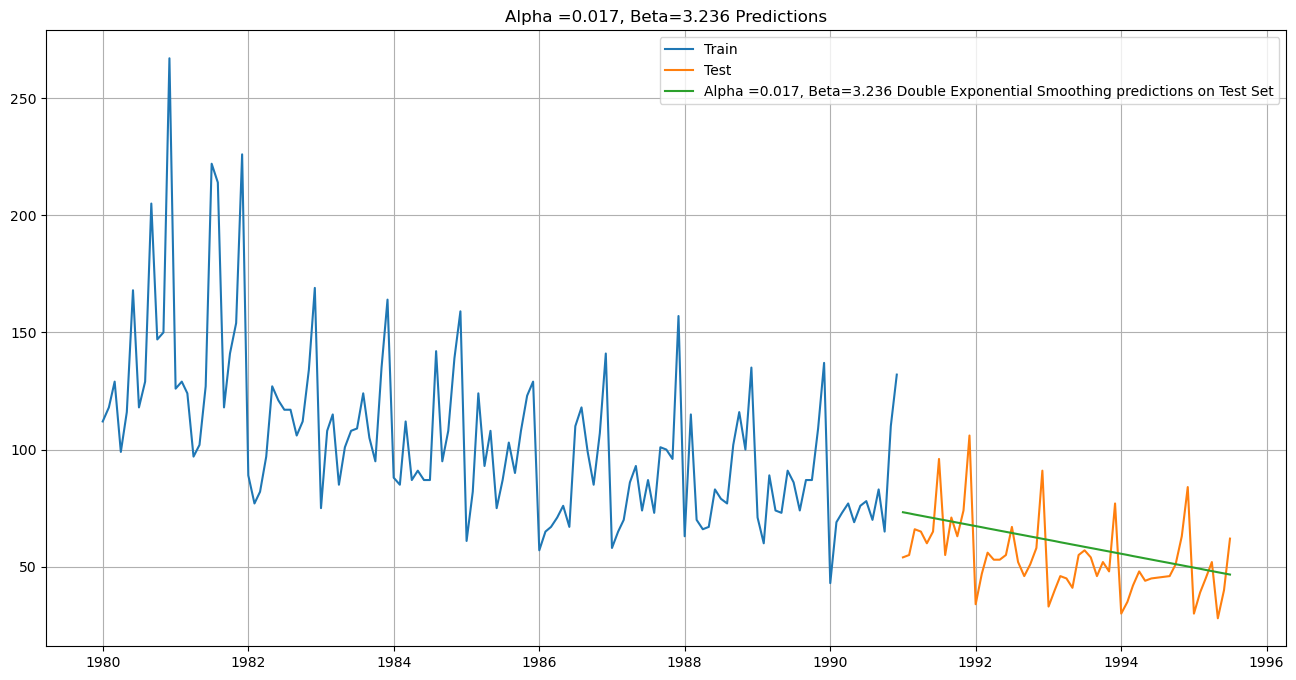

In [330]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.017, Beta=3.236 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.017, Beta=3.236 Predictions');

In [331]:
rmse_model2_test_2 = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict'],squared=False)
print("For Alpha =0.017, Beta=3.236 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model2_test_2))

For Alpha =0.017, Beta=3.236 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 15.707


In [332]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test_2]},index=['Alpha =0.017, Beta=3.236, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.796227
"Alpha =0.017, Beta=3.236, DoubleExponentialSmoothing",15.707052


In [333]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_2

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [334]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model2_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model2_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_2 = resultsDf_2.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model2_train
                                          ,'Test RMSE':rmse_model2_test}, ignore_index=True)

In [335]:
resultsDf_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,35.944983,265.567594
8,0.4,0.3,36.749123,339.306534
1,0.3,0.4,37.393239,358.750942
16,0.5,0.3,37.433314,394.272629
24,0.6,0.3,38.348984,439.296033


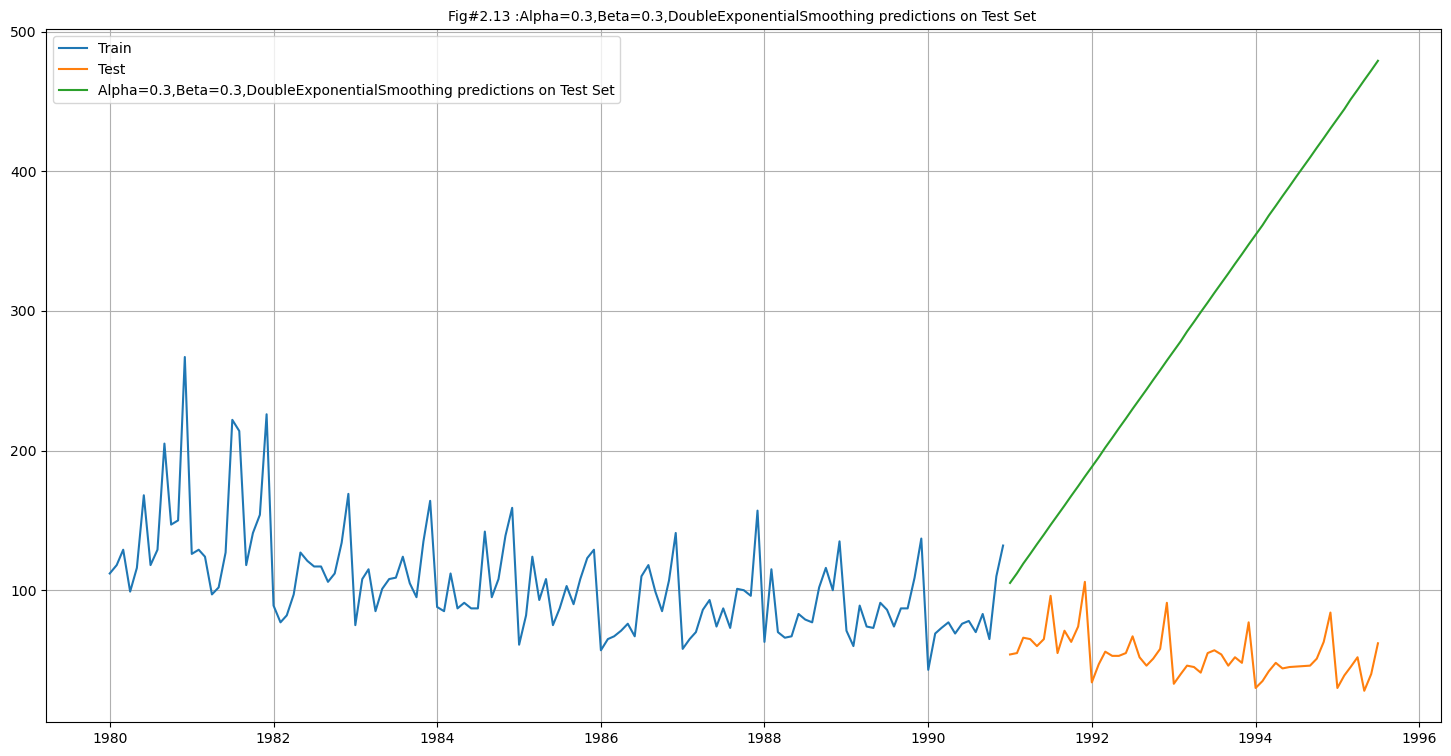

In [336]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.title('Fig#2.13 :Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set ',fontsize=10);
plt.legend(loc='best')
plt.grid();

In [337]:
resultsDf_2_1 = pd.DataFrame({'Test RMSE': [resultsDf_2.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_2_1])
resultsDf

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.796227
"Alpha =0.017, Beta=3.236, DoubleExponentialSmoothing",15.707052
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594


## Model 3: Triple Exponential Smoothing (Holt - Winter's Model)

In [338]:
TES_train = train.copy()
TES_test = test.copy()

In [339]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='additive')

In [340]:
model_TES_autofit = model_TES.fit()

In [341]:
model_TES_autofit.params

{'smoothing_level': 0.08954054664605082,
 'smoothing_trend': 0.0002400108693915795,
 'smoothing_seasonal': 0.003466872515750747,
 'damping_trend': nan,
 'initial_level': 146.5570157826235,
 'initial_trend': -0.547196983509005,
 'initial_seasons': array([-31.17478463, -18.74839869, -10.76961776, -21.36741017,
        -12.63775539,  -7.27430333,   2.61279801,   8.69603625,
          4.79381122,   2.96110122,  21.05738849,  63.18279918]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [342]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
YearMonth,,
1991-01-01,54.0,42.684928
1991-02-01,55.0,54.564005
1991-03-01,66.0,61.995209
1991-04-01,65.0,50.852018
1991-05-01,60.0,59.034271


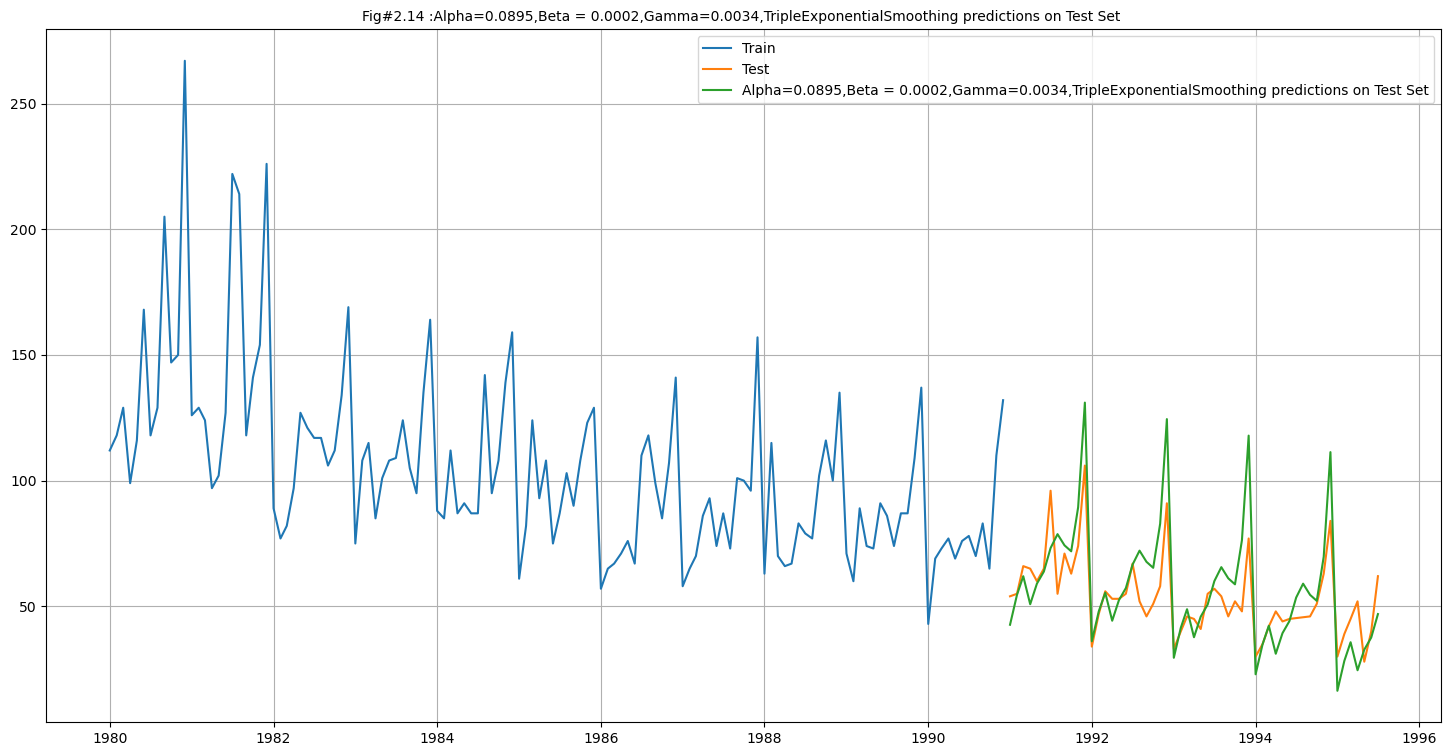

In [343]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.0895,Beta = 0.0002,Gamma=0.0034,TripleExponentialSmoothing predictions on Test Set')
plt.title('Fig#2.14 :Alpha=0.0895,Beta = 0.0002,Gamma=0.0034,TripleExponentialSmoothing predictions on Test Set ',fontsize=10);
plt.legend(loc='best')
plt.grid();

In [344]:
rmse_model3_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.0895,Beta = 0.0002,Gamma=0.0034, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test_1))

For Alpha=0.0895,Beta = 0.0002,Gamma=0.0034, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 14.250


In [345]:
resultsDf_3_1 = pd.DataFrame({'Test RMSE': [rmse_model3_test_1]}
                           ,index=['Alpha=0.0895,Beta = 0.0002,Gamma=0.0034,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_3_1])
resultsDf

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.796227
"Alpha =0.017, Beta=3.236, DoubleExponentialSmoothing",15.707052
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594
"Alpha=0.0895,Beta = 0.0002,Gamma=0.0034,TripleExponentialSmoothing",14.249661


In [346]:
resultsDf_3_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_3_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [347]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model3_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model3_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_3_2 = resultsDf_3_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model3_train,'Test RMSE':rmse_model3_test}
                                                 , ignore_index=True)

In [348]:
resultsDf_3_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
1,0.3,0.3,0.4,25.308660,12.723156
0,0.3,0.3,0.3,24.279693,12.950648
64,0.4,0.3,0.3,25.447354,13.293449
129,0.5,0.3,0.4,27.934042,17.883742
200,0.6,0.4,0.3,29.455453,23.408349


After checking different values of alpha, Beta & Gamma we are able to get RMSE less than 14.24

In [349]:
resultsDf_3_2 = pd.DataFrame({'Test RMSE': [12.723156]}
                           ,index=['Alpha=0.3,Beta = 0.3,Gamma=0.4,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_3_2])
resultsDf

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.796227
"Alpha =0.017, Beta=3.236, DoubleExponentialSmoothing",15.707052
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594
"Alpha=0.0895,Beta = 0.0002,Gamma=0.0034,TripleExponentialSmoothing",14.249661
"Alpha=0.3,Beta = 0.3,Gamma=0.4,TripleExponentialSmoothing",12.723156


## Model 4: Naive forecast

In [350]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [351]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

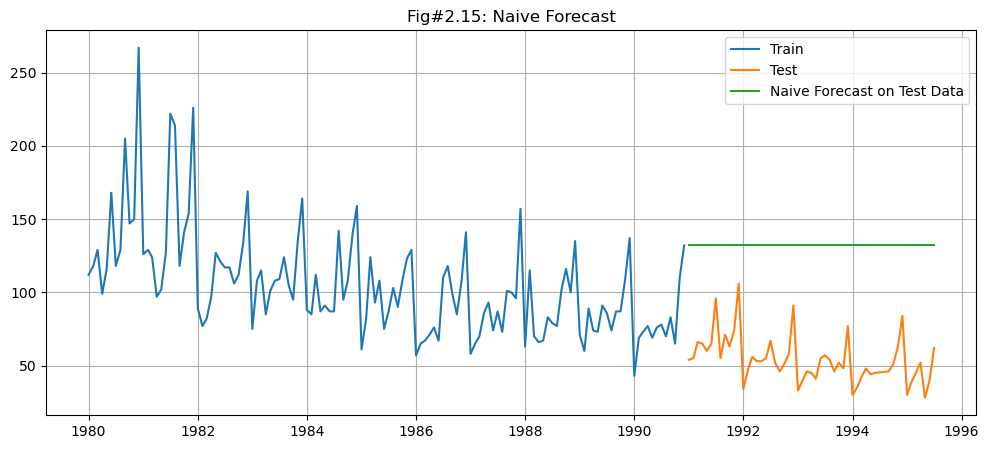

In [352]:
plt.figure(figsize=(12,5))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Fig#2.15: Naive Forecast")
plt.grid();

In [353]:
## Test Data - RMSE

rmse_model4_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For Naive forecast on the Test Data,  RMSE is 79.719


In [354]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.796227
"Alpha =0.017, Beta=3.236, DoubleExponentialSmoothing",15.707052
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594
"Alpha=0.0895,Beta = 0.0002,Gamma=0.0034,TripleExponentialSmoothing",14.249661
"Alpha=0.3,Beta = 0.3,Gamma=0.4,TripleExponentialSmoothing",12.723156
NaiveModel,79.718773


## Model 5: Linear Regression

### Generating the numerical time instance order

In [355]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Train Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Train Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [356]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [357]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [358]:
from sklearn.linear_model import LinearRegression

In [359]:
lr = LinearRegression()

In [360]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

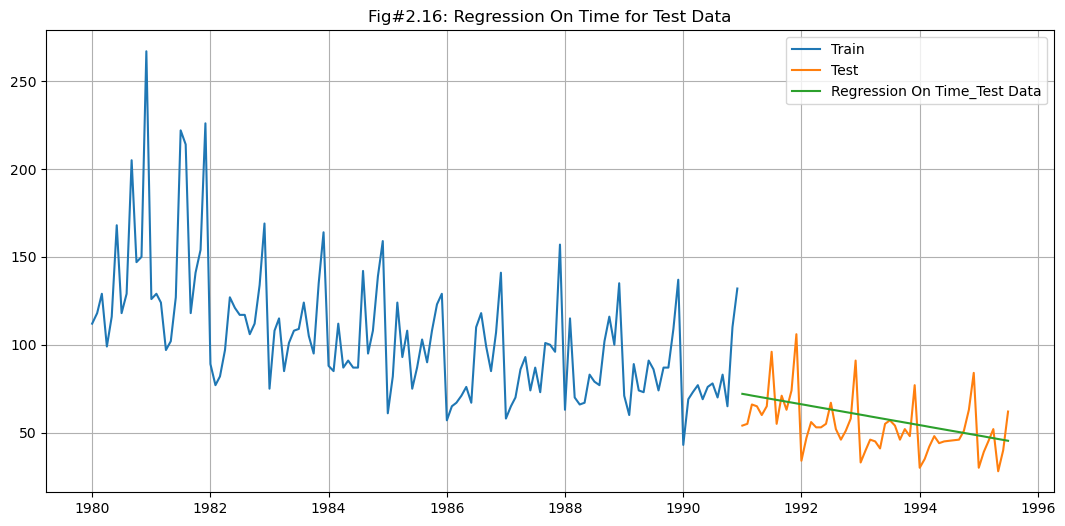

In [361]:
test_predictions_model5 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model5

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.title('Fig#2.16: Regression On Time for Test Data' )
plt.grid();

In [362]:
rmse_model5_test = metrics.mean_squared_error(test['Rose'],test_predictions_model5,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model5_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


In [363]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test]},index=['RegressionOnTime'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.796227
"Alpha =0.017, Beta=3.236, DoubleExponentialSmoothing",15.707052
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594
"Alpha=0.0895,Beta = 0.0002,Gamma=0.0034,TripleExponentialSmoothing",14.249661
"Alpha=0.3,Beta = 0.3,Gamma=0.4,TripleExponentialSmoothing",12.723156
NaiveModel,79.718773
RegressionOnTime,15.268955


## Model 6 : Simple Average

In [364]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [365]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


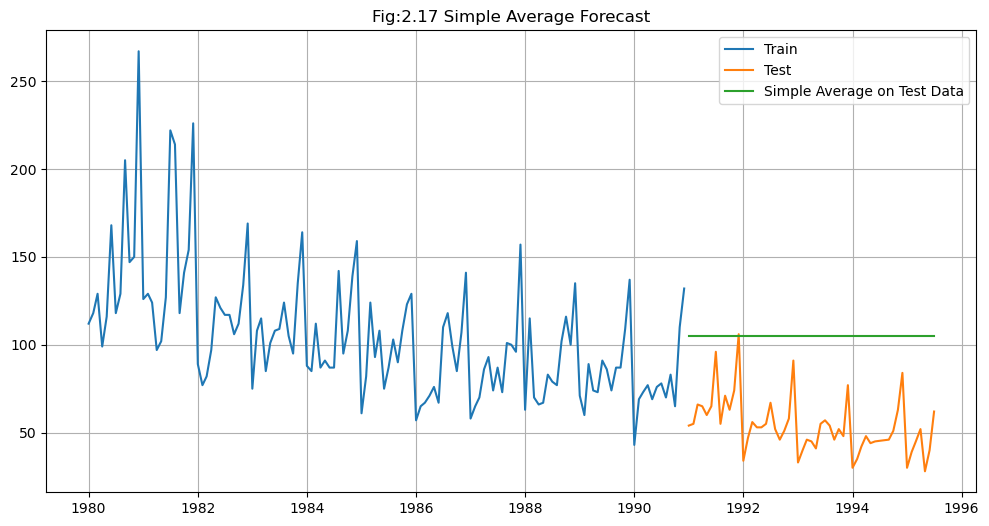

In [366]:
plt.figure(figsize=(12,6))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Fig:2.17 Simple Average Forecast")
plt.grid();

In [367]:
rmse_model6_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [368]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.796227
"Alpha =0.017, Beta=3.236, DoubleExponentialSmoothing",15.707052
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594
"Alpha=0.0895,Beta = 0.0002,Gamma=0.0034,TripleExponentialSmoothing",14.249661
"Alpha=0.3,Beta = 0.3,Gamma=0.4,TripleExponentialSmoothing",12.723156
NaiveModel,79.718773
RegressionOnTime,15.268955
SimpleAverageModel,53.460570


## Model 11 : Moving Average(MA)

In [369]:
MovingAverage = df1.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [370]:
# Trailing moving averages
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,
1980-01-01,112.0,NaN,NaN,NaN
1980-02-01,118.0,NaN,NaN,NaN
1980-03-01,129.0,NaN,NaN,NaN
1980-04-01,99.0,114.5,NaN,NaN
1980-05-01,116.0,115.5,NaN,NaN


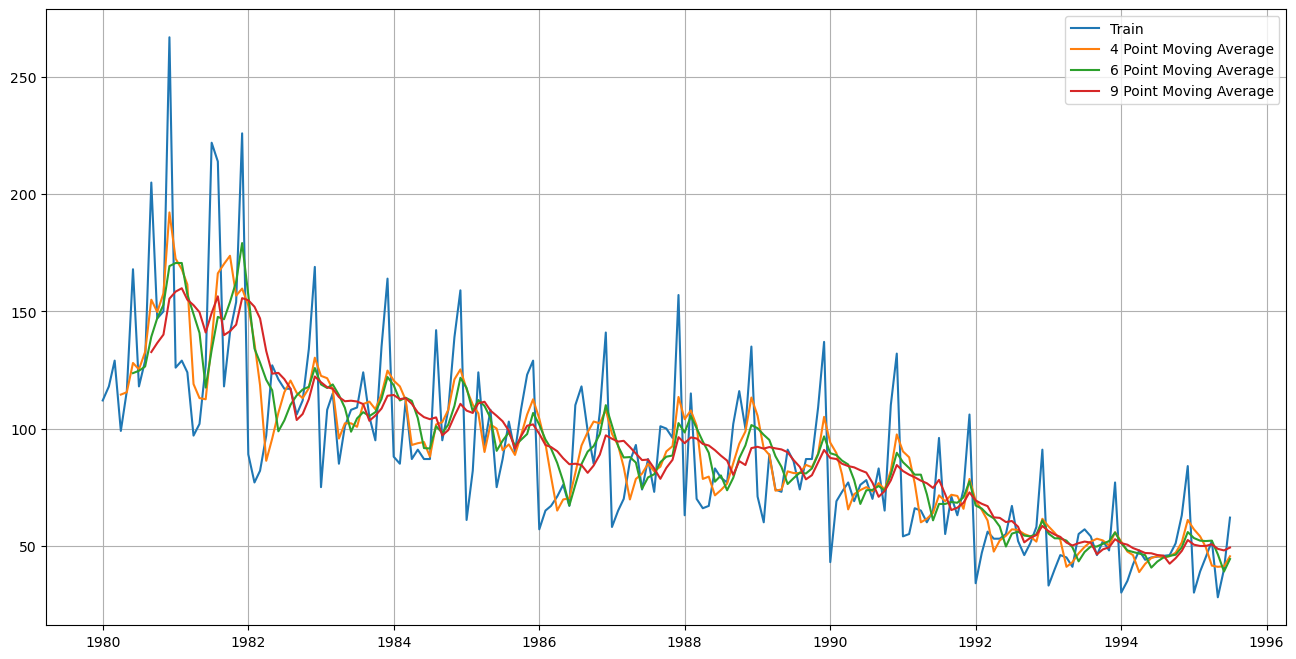

In [371]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [372]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']


trailing_MovingAverage_train.tail()

,Rose,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,
1990-08-01,70.0,73.25,73.833333,76.888889
1990-09-01,83.0,76.75,75.500000,70.888889
1990-10-01,65.0,74.00,73.500000,73.333333
1990-11-01,110.0,82.00,80.333333,77.888889
1990-12-01,132.0,97.50,89.666667,84.444444


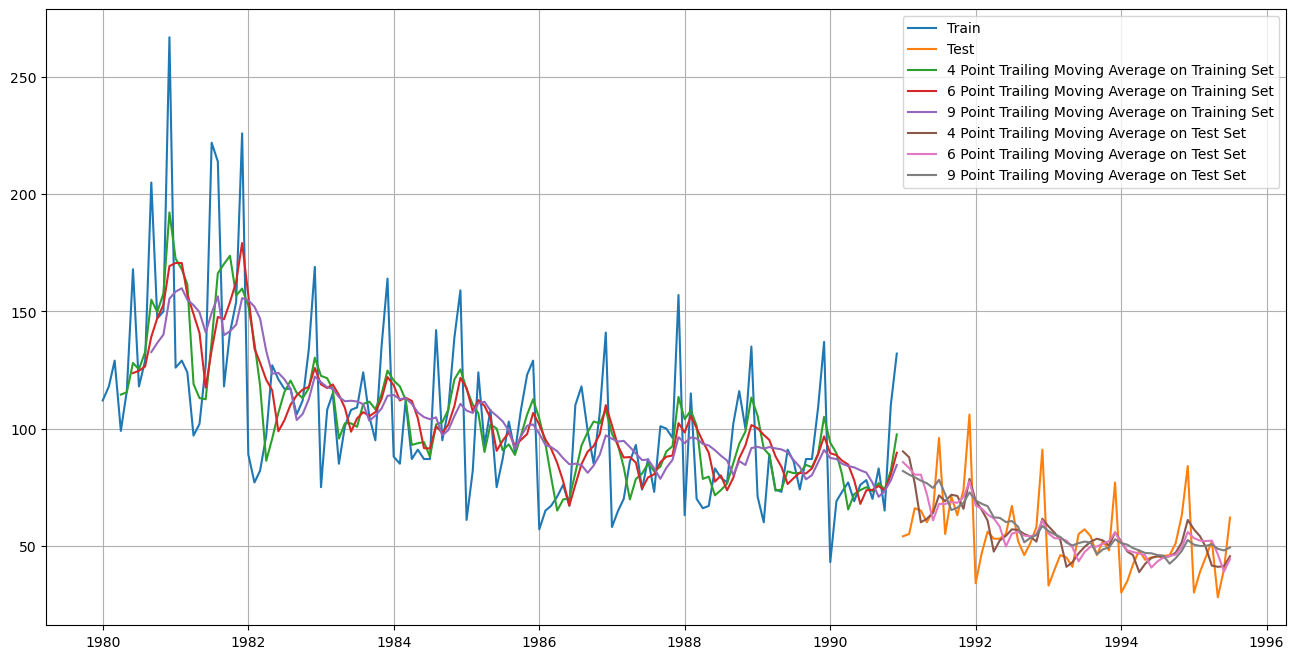

In [373]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [374]:
## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728 


In [375]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.796227
"Alpha =0.017, Beta=3.236, DoubleExponentialSmoothing",15.707052
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594
"Alpha=0.0895,Beta = 0.0002,Gamma=0.0034,TripleExponentialSmoothing",14.249661
"Alpha=0.3,Beta = 0.3,Gamma=0.4,TripleExponentialSmoothing",12.723156
NaiveModel,79.718773
RegressionOnTime,15.268955
SimpleAverageModel,53.460570
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327


So Far we have tried 7 different models and TripleExponentialSmoothing suits very well on our data with lowest RMSE value

# Q2.5 Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

To check the stationarity of the data ADF test can be used which is a hypothesis test and following is the null & alternate hypothesis for this test.

H0  : The Time Series has a unit root and is thus non-stationary.

H1 : The Time Series does not have a unit root and is thus stationary.

### Check for stationarity of the whole Time Series data.

In [376]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

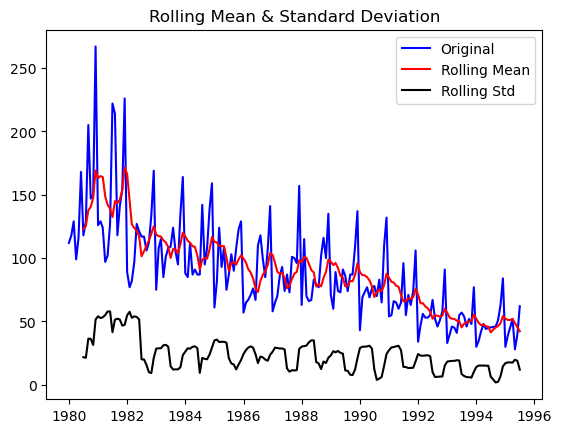

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [377]:
test_stationarity(df1['Rose'])


We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

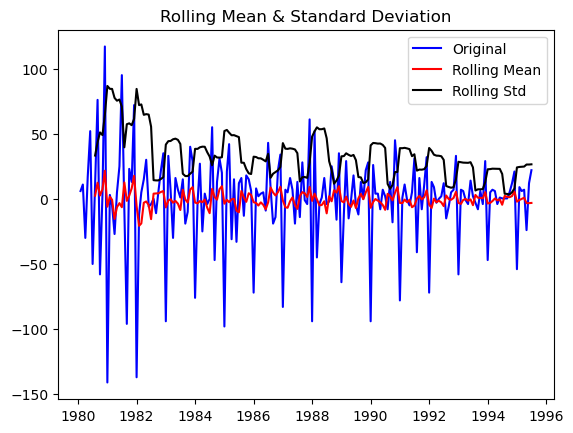

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [378]:
test_stationarity(df1['Rose'].diff().dropna())

We see that at α = 0.05 the Time Series become stationary.

### Check for stationarity of the Training Data Time Series.

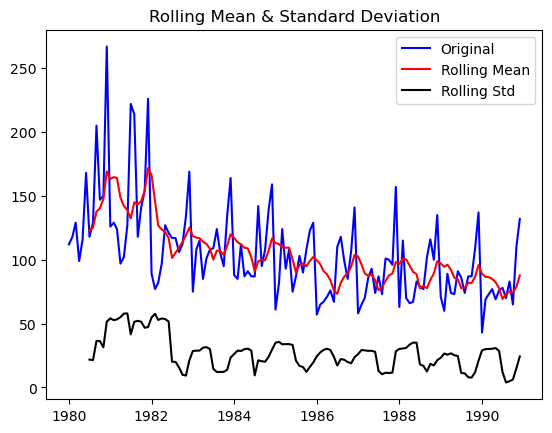

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [379]:
test_stationarity(train['Rose'])

We see that the train data is not stationary at α = 0.05.

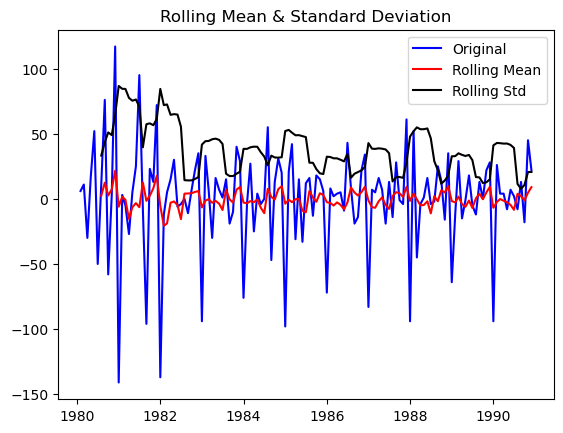

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [380]:
test_stationarity(train['Rose'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at α = 0.05.

# Q2.6 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

## Model 7 : Automated ARIMA Model

In [381]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [382]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [383]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535818
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380032
ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(2, 1, 0) - AIC:1298.611034160493
ARIMA(2, 1, 1) - AIC:1281.5078621868474
ARIMA(2, 1, 2) - AIC:1281.8707222264284


In [384]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1279.671529
5,"(1, 1, 2)",1279.870723
4,"(1, 1, 1)",1280.574230
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722
1,"(0, 1, 1)",1282.309832
6,"(2, 1, 0)",1298.611034
3,"(1, 1, 0)",1317.350311
0,"(0, 1, 0)",1333.154673


In [385]:
auto_ARIMA = ARIMA(train['Rose'], order=(0, 1, 2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Wed, 28 Dec 2022   AIC                           1279.672
Time:                        19:09:10   BIC                           1288.297
Sample:                    01-01-1980   HQIC                          1283.176
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

### Predict on the Test Set using this model and evaluate the model.

In [386]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [387]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

37.30647971665308


In [388]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf_7

,Test RMSE
"ARIMA(0,1,2)",37.30648


In [389]:
resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.796227
"Alpha =0.017, Beta=3.236, DoubleExponentialSmoothing",15.707052
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594
"Alpha=0.0895,Beta = 0.0002,Gamma=0.0034,TripleExponentialSmoothing",14.249661
"Alpha=0.3,Beta = 0.3,Gamma=0.4,TripleExponentialSmoothing",12.723156
NaiveModel,79.718773
RegressionOnTime,15.268955
SimpleAverageModel,53.460570
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327


## Model 8 : Automated SARIMA Model

Let us look at the ACF plot to understand the seasonal parameter for the SARIMA model.

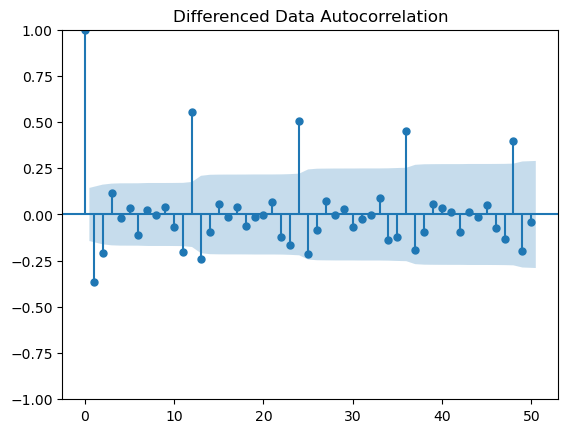

In [390]:
plot_acf(df1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We can see that there is a seasonality at 12.

#### Setting the seasonality as 12 for the  auto SARIMA model.

In [391]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [392]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [393]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720733
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380887
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386036
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753741
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697521
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945577
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.555482591834
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.631404938378
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918292
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330945982
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483302857
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536139
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461671
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988257816824
SARIMA(0, 1, 2)x(0, 0, 0

In [394]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
53,"(1, 1, 2)","(2, 0, 2, 12)",889.899655
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [395]:
import statsmodels.api as sm

auto_SARIMA_8_1 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_8_1 = auto_SARIMA_8_1.fit(maxiter=1000)
print(results_auto_SARIMA_8_1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Wed, 28 Dec 2022   AIC                            887.938
Time:                                    19:09:54   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.814     -0.004      0.996    -372.871     371.185
ma.L2         -0.1573     29.821   

### Predict on the Test Set using this model and evaluate the model.

In [396]:
predicted_auto_SARIMA_8_1 = results_auto_SARIMA_8_1.get_forecast(steps=len(test))


In [397]:
predicted_auto_SARIMA_8_1.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867264,15.928501,31.647976,94.086552
1,70.541190,16.147659,38.892360,102.190019
2,77.356411,16.147656,45.707586,109.005236
3,76.208814,16.147656,44.559989,107.857638
4,72.747398,16.147656,41.098573,104.396223


In [398]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_8_1.predicted_mean,squared=False)
print(rmse)

26.928361676945823


In [399]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(1,0,2,12)'])


resultsDf = pd.concat([resultsDf,resultsDf_8_1])

resultsDf

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.796227
"Alpha =0.017, Beta=3.236, DoubleExponentialSmoothing",15.707052
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594
"Alpha=0.0895,Beta = 0.0002,Gamma=0.0034,TripleExponentialSmoothing",14.249661
"Alpha=0.3,Beta = 0.3,Gamma=0.4,TripleExponentialSmoothing",12.723156
NaiveModel,79.718773
RegressionOnTime,15.268955
SimpleAverageModel,53.460570
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327


We see that the RMSE value have reduced further when the seasonality parameter was changed to 12.

# Q2.7 Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## Model 9: ARIMA model as per ACF and the PACF cut-off.

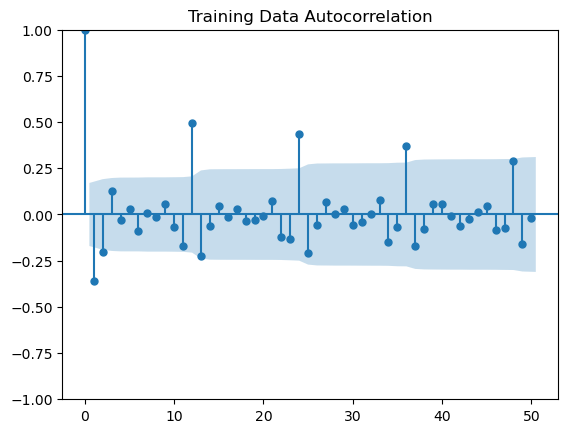

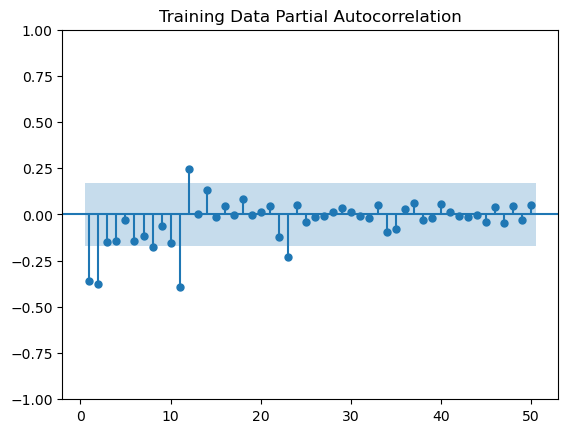

In [400]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop', lags=50)
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle', lags=50)
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 2.

The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 1.

In [401]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(2,1,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -636.754
Date:                Wed, 28 Dec 2022   AIC                           1281.508
Time:                        19:10:08   BIC                           1293.009
Sample:                    01-01-1980   HQIC                          1286.181
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1834      0.078      2.353      0.019       0.031       0.336
ar.L2         -0.0959      0.106     -0.907      0.364      -0.303       0.111
ma.L1         -0.9075      0.058    -15.663      0.0

### Predict on the Test Set using this model and evaluate the model.

In [402]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [403]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
print(rmse)

36.83353005428152


In [404]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,1)'])


resultsDf = pd.concat([resultsDf,resultsDf_9])

resultsDf

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.796227
"Alpha =0.017, Beta=3.236, DoubleExponentialSmoothing",15.707052
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594
"Alpha=0.0895,Beta = 0.0002,Gamma=0.0034,TripleExponentialSmoothing",14.249661
"Alpha=0.3,Beta = 0.3,Gamma=0.4,TripleExponentialSmoothing",12.723156
NaiveModel,79.718773
RegressionOnTime,15.268955
SimpleAverageModel,53.460570
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327


## Model 10: SARIMA model as per ACF and the PACF cut-off.

Let us look at the ACF and the PACF plots once more.

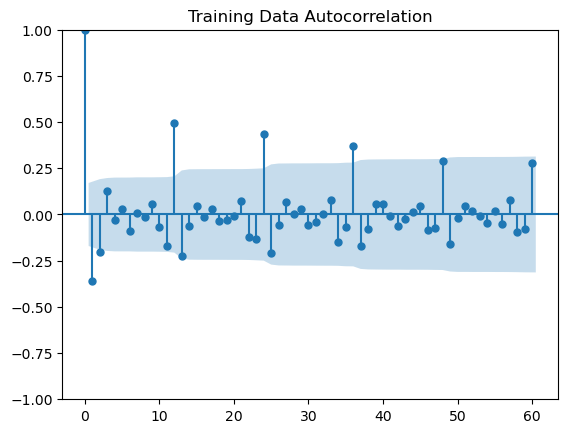

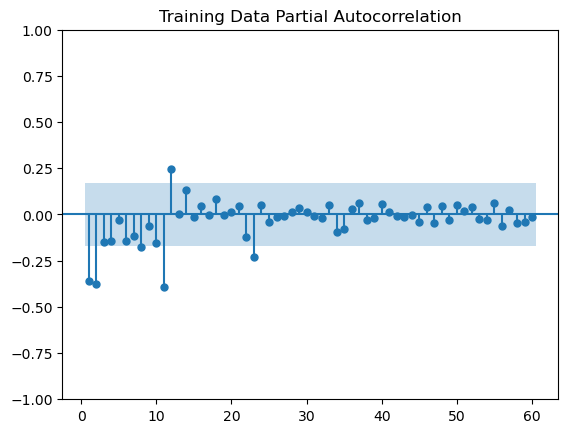

In [405]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop', lags =60)
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle', lags =60);

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12. We are taking the p value to be 2 and the q value also to be 1 as the parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 1.

The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.

In [406]:
import statsmodels.api as sm

manual_SARIMA_10 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 1),
                                seasonal_order=(1, 1, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_10 = manual_SARIMA_10.fit(maxiter=1000)
print(results_manual_SARIMA_10.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                          y   No. Observations:                  132
Model:             SARIMAX(2, 1, 1)x(1, 1, [1, 2, 3], 12)   Log Likelihood               -1795.937
Date:                                    Wed, 28 Dec 2022   AIC                           3607.875
Time:                                            19:10:18   BIC                           3627.030
Sample:                                                 0   HQIC                          3615.560
                                                    - 132                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0863         -0       -inf      0

### Predict on the Test Set using this model and evaluate the model

In [407]:
predicted_manual_SARIMA_10 = results_manual_SARIMA_10.get_forecast(steps=len(test))

In [408]:
predicted_manual_SARIMA_10.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,15.901788,1.698699e+09,-3.329388e+09,3.329388e+09
1,81.208099,1.907076e+09,-3.737800e+09,3.737800e+09
2,57.752404,1.926575e+09,-3.776018e+09,3.776018e+09
3,73.426243,1.984908e+09,-3.890349e+09,3.890349e+09
4,63.471574,2.097352e+09,-4.110734e+09,4.110734e+09


In [409]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_10.predicted_mean,squared=False)
print(rmse)

23.46284894085704


In [410]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(2,1,1)(1,1,3,12)'])


resultsDf = pd.concat([resultsDf,resultsDf_10])

resultsDf

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.796227
"Alpha =0.017, Beta=3.236, DoubleExponentialSmoothing",15.707052
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594
"Alpha=0.0895,Beta = 0.0002,Gamma=0.0034,TripleExponentialSmoothing",14.249661
"Alpha=0.3,Beta = 0.3,Gamma=0.4,TripleExponentialSmoothing",12.723156
NaiveModel,79.718773
RegressionOnTime,15.268955
SimpleAverageModel,53.460570
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327


# Q2.8 Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

We have already build the data frame along with the paramteres used in model building and respective Test RMSE value.

In [411]:
resultsDf

,Test RMSE
"Alpha=0.098,SimpleExponentialSmoothing",36.796227
"Alpha =0.017, Beta=3.236, DoubleExponentialSmoothing",15.707052
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",265.567594
"Alpha=0.0895,Beta = 0.0002,Gamma=0.0034,TripleExponentialSmoothing",14.249661
"Alpha=0.3,Beta = 0.3,Gamma=0.4,TripleExponentialSmoothing",12.723156
NaiveModel,79.718773
RegressionOnTime,15.268955
SimpleAverageModel,53.460570
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327


# Q2.9 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

We have built multiple models and based on the minimum RMSE values TripleExponentialSmoothing is the best models.

## Building the TripleExponentialSmoothing model on the Full Data.

In [412]:
fullmodel1 = ExponentialSmoothing(df1,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.3,
                                                                 smoothing_trend=0.3,
                                                                 smoothing_seasonal=0.4)

In [413]:
RMSE_fullmodel1 = metrics.mean_squared_error(df1['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 21.680604594672754


In [414]:
# Getting the predictions for the next 12 months 
prediction_2 = fullmodel1.forecast(steps=12)

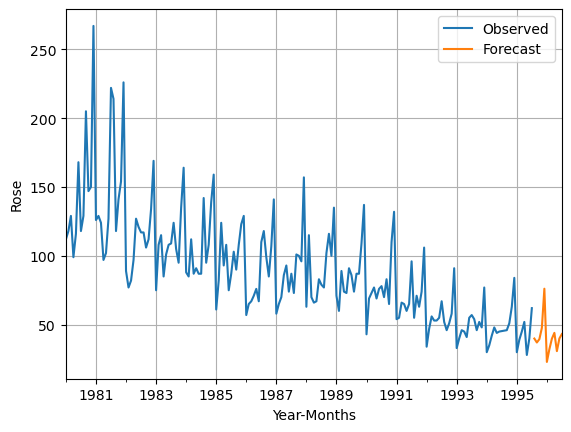

In [415]:
axis = df1['Rose'].plot(label='Observed')
prediction_2.plot(ax=axis, label='Forecast')

axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid();

In [416]:
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_2_df

,lower_CI,prediction,upper_ci
1995-08-01,-2.693344,39.913880,82.521105
1995-09-01,-5.546417,37.060808,79.668033
1995-10-01,-3.168022,39.439203,82.046428
1995-11-01,5.034250,47.641475,90.248700
1995-12-01,33.512938,76.120163,118.727388
1996-01-01,-19.667110,22.940115,65.547340
1996-02-01,-10.458781,32.148444,74.755669
1996-03-01,-2.811685,39.795540,82.402765
1996-04-01,1.441612,44.048836,86.656061
1996-05-01,-11.819076,30.788149,73.395374


So we can see that TripleExponentialSmoothing Model perform very well on the data as it has low RMSE.

# Q2.10 Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

After checking All RMSE values we can say that TripleExponentialSmoothing gives the lowest RMSE Value.

As per the final plot on complete data we can say that our model is able to forecast very well. 

We have seen that past data has more influence in the forecast so more the past data better the forecast.

we have seen that sales of wine goes up at the end of the year possibly due to festival seasons so for the other months where sales are low company can provide different offers.

Based on the SARIMA model which built on Full data we got Jarque-Bera test's P-value is not less than 0.05 so we failed to reject the H0 & we found that Data is normal .

Based on the Ljung-Box test's P-value we failed to reject the H0 so we can say that residuals are independent.

With the help of next 12 months forecast sales company can make plan to increase the sales for those month where forecast shows less sales.

Sales of Rose wine decreasing continuously so need to check what went wrong in wine sales.

Across the year Month 'April' sales are very low so need to check what is the impact of april month sales on overall sales.

Maximum drop in Average wine sales occur after year 1981 and since then it kept decresing .

#### THE END